In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
csv_link="../dataset/sample.csv"

In [3]:
# TODO: Create more data
dataframe = pd.read_csv(csv_link)

In [4]:
dataframe.head()

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4
0,239,124,142,250,232,224,182,226,211,216,167,177
1,232,180,184,238,214,211,164,147,147,103,89,94
2,251,231,198,180,248,200,160,231,229,255,174,188
3,5,68,94,24,154,180,117,230,218,212,241,244
4,231,210,204,185,183,189,134,139,142,238,237,231


In [5]:
input_sequence = dataframe.copy()
target_sequence = pd.DataFrame([input_sequence.pop(x) for x in ['r2','g2','b2','r3','g3','b3','r4','g4','b4']]).T


In [6]:
target_sequence

,r2,g2,b2,r3,g3,b3,r4,g4,b4
0,250,232,224,182,226,211,216,167,177
1,238,214,211,164,147,147,103,89,94
2,180,248,200,160,231,229,255,174,188
3,24,154,180,117,230,218,212,241,244
4,185,183,189,134,139,142,238,237,231
...,...,...,...,...,...,...,...,...,...
1995,230,222,211,51,135,93,218,102,80
1996,235,81,94,211,192,178,11,9,9
1997,47,217,239,5,179,235,234,234,230
1998,0,115,92,247,135,44,181,177,172


In [7]:
X = np.reshape(input_sequence, (-1,3))
y = np.reshape(target_sequence, (-1,9))


In [8]:
X


array([[239, 124, 142],
       [232, 180, 184],
       [251, 231, 198],
       ...,
       [ 69,  97, 119],
       [ 35,  26,  26],
       [ 72, 128, 119]], dtype=int64)

In [9]:
y

array([[250, 232, 224, ..., 216, 167, 177],
       [238, 214, 211, ..., 103,  89,  94],
       [180, 248, 200, ..., 255, 174, 188],
       ...,
       [ 47, 217, 239, ..., 234, 234, 230],
       [  0, 115,  92, ..., 181, 177, 172],
       [243,  22,  30, ...,   4,  56,  78]], dtype=int64)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [11]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(9, input_shape=(3,),activation='relu'),
   
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(target_sequence.shape[1])  
  ])

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])



In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 36        
                                                                 
 dense_1 (Dense)             (None, 32)                320       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 46,125
Trainable params: 46,125
Non-traina

In [14]:
# Train the model
history=model.fit(X_train, y_train, epochs=4000, batch_size=10,
                    verbose=1,validation_data=(X_test,y_test))



Epoch 1/4000
134/134 [==============================] - 3s 3ms/step - loss: 10881.9268 - accuracy: 0.2366 - val_loss: 9627.8135 - val_accuracy: 0.2424
Epoch 2/4000
134/134 [==============================] - 0s 2ms/step - loss: 9209.3467 - accuracy: 0.2075 - val_loss: 9270.8701 - val_accuracy: 0.2167
Epoch 3/4000
134/134 [==============================] - 0s 3ms/step - loss: 8993.5264 - accuracy: 0.2246 - val_loss: 9165.3545 - val_accuracy: 0.1727
Epoch 4/4000
134/134 [==============================] - 0s 2ms/step - loss: 8837.4453 - accuracy: 0.2127 - val_loss: 8842.5596 - val_accuracy: 0.2076
Epoch 5/4000
134/134 [==============================] - 0s 2ms/step - loss: 8696.9219 - accuracy: 0.2433 - val_loss: 9113.3555 - val_accuracy: 0.2152
Epoch 6/4000
134/134 [==============================] - 0s 2ms/step - loss: 8295.6914 - accuracy: 0.2366 - val_loss: 8284.4463 - val_accuracy: 0.2258
Epoch 7/4000
134/134 [==============================] - 0s 2ms/step - loss: 7866.1685 - accuracy: 0

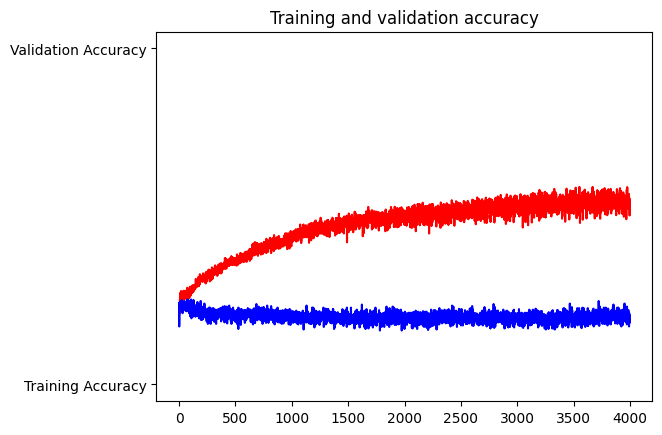

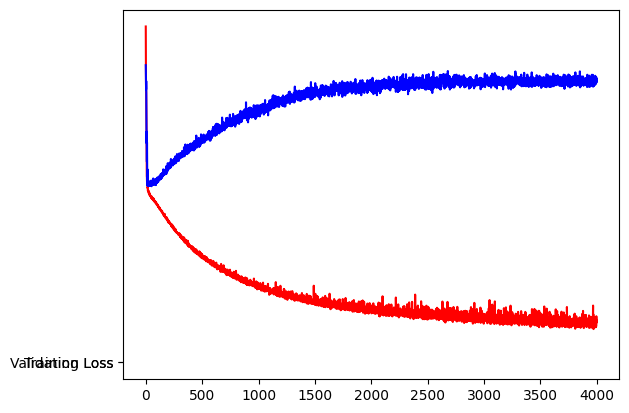

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [16]:
# Generate some test data
test_input = np.array([[223,158,114]])


predictions = model.predict(test_input)

# Print the predictions
print(predictions)

1/1 [==============================] - 0s 123ms/step
[[ 59.45414   82.73013   59.906822  88.85661   89.3907    68.61859
  250.17514  107.32785   93.784584]]


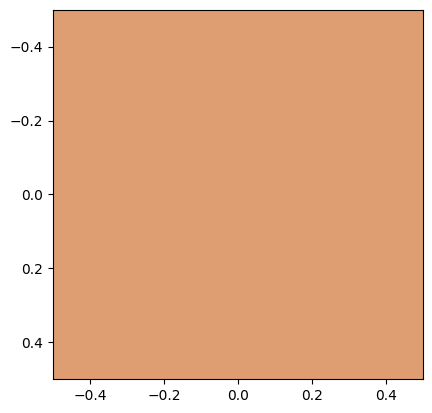

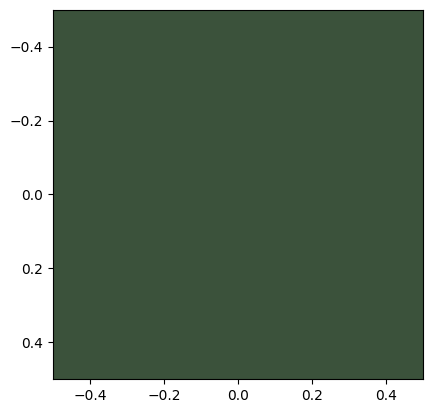

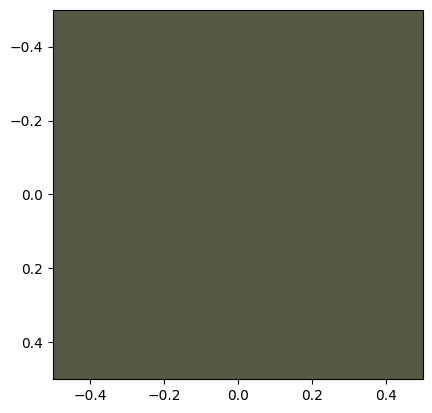

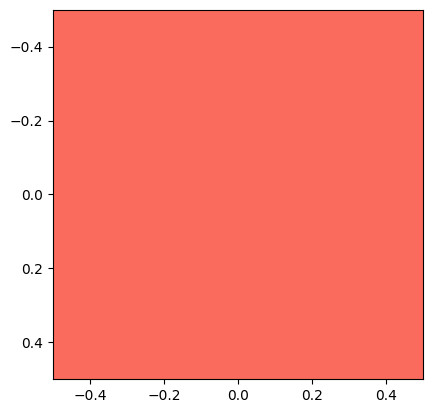

In [17]:
plt.imshow([[[x / 255 for x in test_input[0]]]])
plt.show()

plt.imshow([[[x / 255 for x in predictions[0][0:3]]]])
plt.show()
plt.imshow([[[x / 255 for x in predictions[0][3:6]]]])
plt.show()
plt.imshow([[[x / 255 for x in predictions[0][6:9]]]])
plt.show()